In [1]:
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import math
from IPython.display import clear_output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None
# times=[]
# with open('timelist.txt', 'r') as fp:
#     for line in fp:
#         times.append(line[:-1])

# mintimes=[]
# with open('minutetimelist.txt', 'r') as fp:
#     for line in fp:
#         mintimes.append(line[:-1])

nodates=[]
with open('nodatelist.txt', 'r') as fp:
    for line in fp:
        nodates.append(line[:-1])

In [2]:
# bnifty = pd.read_csv('banknifty_master.csv',low_memory=False,header=None,on_bad_lines='skip',names=["Strike", "Date", "Time", "Open","High","Low","Close","Volume"])
# bnifty = bnifty[bnifty['Time'].isin(times)]
# bnifty = bnifty[(bnifty.Date >= '2018/05/02') & (bnifty.Date <= '2020/02/14')]
# bnifty = bnifty[~bnifty['Date'].isin(nodates)]
# bnifty.reset_index(inplace=True)
# bnifty.drop('index',axis=1,inplace=True)
niftyeod = pd.read_csv('NIFTY50_EOD.csv')[::-1]
niftyeod['Date'] = pd.to_datetime(niftyeod.Date)
niftyeod['Date'] = niftyeod['Date'].astype(str)
niftyeod['Date'] = niftyeod['Date'].apply(lambda x:x[:10])
# niftyeod['Date'] = niftyeod['Date'].astype(str)
# niftyeod['Date'] = niftyeod['Date'].apply(lambda line:line.replace('-', '/'))
niftyeod = niftyeod[~niftyeod['Date'].isin(nodates)]
niftyeod.reset_index(inplace=True)
niftyeod.drop('index',axis=1,inplace=True)
nifty5 = pd.read_csv('NIFTY50_5min.csv')#,low_memory=False,on_bad_lines='skip')
nifty5['Date'] = nifty5['Date'].astype(str)
nifty5['Time'] = nifty5['Date'].apply(lambda x:x[11:16])
nifty5['Date'] = nifty5['Date'].apply(lambda x:x[:10])
# nifty5 = nifty5[nifty5['Time'].isin(mintimes)]
# nifty5['Date'] = nifty5['Date'].astype(str)
# nifty5['Date'] = nifty5['Date'].apply(lambda x:x[:4]+'/'+x[4:6]+'/'+x[6:])
# # nifty5 = nifty5[(nifty5.Date >= '2018/01/01')]
# # missingdates = list(set(nifty5['Date']) - set(bnifty['Date']))
# # missingdates=missingdates+['2019/04/24','2020/02/18','2020/03/13','2020/03/23']
nifty5 = nifty5[~nifty5['Date'].isin(nodates)]
nifty5.reset_index(inplace=True)
nifty5.drop('index',axis=1,inplace=True)
pivots = pd.DataFrame(columns=['Date','PP','BC','TC','R1','R2','R3','S1','S2','S3'])
pivots['Date']=niftyeod['Date'].shift(-1)
pivots.drop(len(niftyeod)-1,inplace=True)
pivots['PP'] = (niftyeod['High']+niftyeod['Low']+niftyeod['Close'])/3
pivots['BC'] = (niftyeod['High']+niftyeod['Low'])/2
pivots['TC'] = pivots['PP']-(niftyeod['High']+niftyeod['Low'])/2+pivots['PP']
pivots['R1'] = pivots['PP']*2-niftyeod['Low']
pivots['R2'] = pivots['PP'] + niftyeod['High'] - niftyeod['Low']
pivots['R3'] = niftyeod['High'] - 2*niftyeod['Low'] + 2*pivots['PP']
pivots['S1'] = pivots['PP']*2-niftyeod['High']
pivots['S2'] = pivots['PP'] - niftyeod['High'] + niftyeod['Low']
pivots['S3'] = niftyeod['Low'] - 2*niftyeod['High'] + 2*pivots['PP']
pivots.index = list(range(1,len(niftyeod)))
for i in range(len(pivots['PP'])):
    if pivots['BC'][i+1]>pivots['TC'][i+1]:
        temp=pivots['BC'][i+1]
        pivots['BC'][i+1]=pivots['TC'][i+1]
        pivots['TC'][i+1]=temp        

In [3]:
pivots

,Date,PP,BC,TC,R1,R2,R3,S1,S2,S3
1,2015-01-12,8259.533333,8247.050000,8272.016667,8328.266667,8372.033333,8440.766667,8215.766667,8147.033333,8103.266667
2,2015-01-13,8300.400000,8289.100000,8311.700000,8355.200000,8387.400000,8442.200000,8268.200000,8213.400000,8181.200000
3,2015-01-14,8307.983333,8303.691667,8312.275000,8348.066667,8396.733333,8436.816667,8259.316667,8219.233333,8170.566667
4,2015-01-15,8280.200000,8278.850000,8281.550000,8323.750000,8370.000000,8413.550000,8233.950000,8190.400000,8144.150000
5,2015-01-20,8467.250000,8453.825000,8480.675000,8553.950000,8613.800000,8700.500000,8407.400000,8320.700000,8260.850000
...,...,...,...,...,...,...,...,...,...,...
1518,2021-03-19,14637.216667,14597.533333,14676.900000,14795.833333,15033.816667,15192.433333,14399.233333,14240.616667,14002.633333
1519,2021-03-22,14627.450000,14569.175000,14685.725000,14904.800000,15065.600000,15342.950000,14466.650000,14189.300000,14028.500000
1520,2021-03-23,14699.383333,14680.875000,14717.891667,14800.916667,14865.433333,14966.966667,14634.866667,14533.333333,14468.816667
1521,2021-03-24,14800.116667,14792.800000,14807.433333,14893.233333,14971.716667,15064.833333,14721.633333,14628.516667,14550.033333


In [4]:
niftyeod

,Date,Open,High,Low,Close
0,2015-01-09,8285.45,8303.30,8190.80,8284.50
1,2015-01-12,8291.35,8332.60,8245.60,8323.00
2,2015-01-13,8346.15,8356.65,8267.90,8299.40
3,2015-01-14,8307.25,8326.45,8236.65,8277.50
4,2015-01-15,8424.50,8527.10,8380.55,8494.10
...,...,...,...,...,...
1518,2021-03-19,14471.15,14788.25,14350.10,14744.00
1519,2021-03-22,14736.30,14763.90,14597.85,14736.40
1520,2021-03-23,14768.55,14878.60,14707.00,14814.75
1521,2021-03-24,14712.45,14752.35,14535.00,14549.40


In [5]:
times=[]
with open('timelist.txt', 'r') as fp:
    for line in fp:
        times.append(line[:-1])

In [7]:
for i in nifty5['Date'].unique():
    if list(nifty5[nifty5['Date']==i]['Time'])!=times:
        print(i)

In [10]:
i=1
a=0
nifty5.iloc[(i+a)*75]

Date     2015-01-12
Open        8291.35
High        8291.35
Low          8245.6
Close        8267.6
Time          09:15
Name: 75, dtype: object

In [11]:
times2=[]
with open('shorttimelist.txt', 'r') as fp:
    for line in fp:
        times2.append(line[:-1])

In [12]:
i=0
a=0
j=1
nifty5['Close'][(i+a)*75+j]

8301.0

In [13]:
nifty5

,Date,Open,High,Low,Close,Time
0,2015-01-09,8285.45,8301.30,8285.45,8301.20,09:15
1,2015-01-09,8300.50,8303.00,8293.25,8301.00,09:20
2,2015-01-09,8301.65,8302.55,8286.80,8294.15,09:25
3,2015-01-09,8294.10,8295.75,8280.65,8288.50,09:30
4,2015-01-09,8289.10,8290.45,8278.00,8283.45,09:35
...,...,...,...,...,...,...
114220,2021-03-25,14338.40,14349.70,14319.05,14319.05,15:05
114221,2021-03-25,14319.15,14320.25,14274.15,14299.00,15:10
114222,2021-03-25,14298.90,14315.80,14287.55,14299.75,15:15
114223,2021-03-25,14299.45,14317.40,14295.75,14314.95,15:20


In [40]:
if 0 in list(nifty5['Close'][(25+a)*75:(25+a)*75+4+1].apply(lambda x:x>8000)):
    print('True')    

In [36]:
list(nifty5['Close'][(25+a)*75:(25+a)*75+4+1].apply(lambda x:x>8000))[0]

True

In [35]:
if 1 in [1,2,3]:
    print(1)

1


In [45]:
c=0
profp=[]
lossp=[]
def buy(i,j,a,tgt,sl):
    global c,profp,lossp
    c=c+1
    byp=nifty5['Close'][(i+a)*75+j]
    d=nifty5['Date'][(i+a)*75+j]
    for k in range(j,70):
        if nifty5['Close'][(i+a)*75+k]<sl:
            #print('Date: {} Target: ₹{:.2f}  Stoploss: ₹{:.2f} Long Stoploss hit!'.format(d,tgt,sl))
            lossp.append(100*(byp-sl)/byp)
            return sl
        if nifty5['High'][(i+a)*75+k]>tgt:
            #print('Date: {} Target: ₹{:.2f}  Stoploss: ₹{:.2f} Long Target hit!'.format(d,tgt,sl))
            profp.append(100*(tgt-byp)/byp)
            return tgt
    #print('Date: {} Target: ₹{:.2f}  Stoploss: ₹{:.2f}  Time out!'.format(d,tgt,sl))
    return nifty5['Low'][(i+a)*75+k]#(nifty5[(nifty5['Date']==d) & (nifty5['Time']=='15:25')]['Close']).iloc[0]

def sell(i,j,a,tgt,sl):
    global c,profp,lossp
    c=c+1
    slp=nifty5['Close'][(i+a)*75+j]
    d=nifty5['Date'][(i+a)*75+j]
    for k in range(j,70):
        if nifty5['Low'][(i+a)*75+k]<tgt:
            #print('Date: {} Target: ₹{:.2f}  Stoploss: ₹{:.2f} Short Target hit!'.format(d,tgt,sl))
            profp.append(100*(slp-tgt)/slp)
            return tgt
        if nifty5['Close'][(i+a)*75+k]>sl:
            #print('Date: {} Target: ₹{:.2f}  Stoploss: ₹{:.2f} Short Stoploss hit!'.format(d,tgt,sl))
            lossp.append(100*(sl-slp)/slp)
            return sl
    #print('Date: {} Target: ₹{:.2f}  Stoploss: ₹{:.2f}  Time out!'.format(d,tgt,sl))
    return nifty5['Low'][(i+a)*75+k]#(nifty5[(nifty5['Date']==d) & (nifty5['Time']=='15:25')]['Close']).iloc[0]

flag=0
profit=0
loss=0
a=0
ini=100000
balance=ini
minbalance=ini
maxbalance=0
bal=[]
tgt1=0
sl1=0
c1=0
for i in range(1,nifty5.Date.nunique()):
    flag=0
    bal.append(balance)
    profit=0
#     x=0.2
#     sl1=x*niftyeod['Close'][i+a-1]
#     tgt1=x*niftyeod['Close'][i+a-1]
    n=int(balance/niftyeod['Open'][i+a])
#     if nifty5['Open'][(i+a)*75]>niftyeod['High'][i+a-1]:
#         c1+=1
#         if 0<=nifty5['Open'][(i+a)*75]-pivots['R2'][i+a]<=sl1 and nifty5['Open'][(i+a)*75]<=(pivots['R3'][i+a]-tgt1):
#             sel=buy(nifty5['Date'][(i+a)*75],pivots['R3'][i+a],pivots['R2'][i+a])
#             profit=sel-nifty5['Open'][(i+a)*75]
#         elif 0<=nifty5['Open'][(i+a)*75]-pivots['R1'][i+a]<=sl1 and nifty5['Open'][(i+a)*75]<=(pivots['R2'][i+a]-tgt1):
#             sel=buy(nifty5['Date'][(i+a)*75],pivots['R2'][i+a],pivots['R1'][i+a])
#             profit=sel-nifty5['Open'][(i+a)*75]
#         elif 0<=nifty5['Open'][(i+a)*75]-max(pivots['BC'][i+a],pivots['TC'][i+a])<=sl1 and nifty5['Open'][(i+a)*75]<=(pivots['R1'][i+a]-tgt1):
#             sel=buy(nifty5['Date'][(i+a)*75],pivots['R1'][i+a],max(pivots['BC'][i+a],pivots['TC'][i+a]))
#             profit=sel-nifty5['Open'][(i+a)*75]


    if (pivots['TC'][i+a]-pivots['BC'][i+a])<0.003*niftyeod['Close'][i+a-1]:
        continue
    for j in range(1,40):    
        if 0 not in list(nifty5['Close'][(i+a)*75+j-10:(i+a)*75+j].apply(lambda x:x<pivots['BC'][i+a])):#nifty5['Close'][(i+a)*75]<pivots['BC'][i+a] and nifty5['Open'][(i+a)*75]<pivots['BC'][i+a]:
            # Long from below BC to TC
            if nifty5['Open'][(i+a)*75+j]<pivots['BC'][i+a] and nifty5['Close'][(i+a)*75+j]>pivots['BC'][i+a]:
                sel=buy(i,j,a,pivots['TC'][i+a],nifty5['Open'][(i+a)*75+j])
                profit=profit+sel-nifty5['Close'][(i+a)*75+j]
                if flag==0:
                    c1+=1
                    flag=1
                
        if 0 not in list(nifty5['Close'][(i+a)*75+j-10:(i+a)*75+j].apply(lambda x:x>pivots['TC'][i+a])):#nifty5['Close'][(i+a)*75]>pivots['TC'][i+a] and nifty5['Open'][(i+a)*75]>pivots['TC'][i+a]:
            # Short from above TC to BC
            if nifty5['Close'][(i+a)*75+j]<pivots['TC'][i+a] and nifty5['Open'][(i+a)*75+j]>pivots['TC'][i+a]:
                buyy=sell(i,j,a,pivots['BC'][i+a],nifty5['Open'][(i+a)*75+j])
                profit=profit+nifty5['Close'][(i+a)*75+j]-buyy
                if flag==0:
                    c1+=1
                    flag=1
                
                #print('Profit of ₹{:.2f} with risk of ₹{:.2f} and reward of ₹{:.2f}'.format(n*profit,n*(nifty5['Open'][(i+a)*75+j]-nifty5['Close'][(i+a)*75+j]),n*(nifty5['Close'][(i+a)*75+j]-pivots['BC'][i+a])))
                #print('CPR difference of :₹{:.2f} at a percentage of {:.2f}'.format((pivots['TC'][i+a]-pivots['BC'][i+a]),100*(pivots['TC'][i+a]-pivots['BC'][i+a])/niftyeod['Close'][i+a-1]))
            
    balance=balance+n*profit
    if balance<0:
        print("Total Loss")
        break
    if balance>=maxbalance:
        maxbalance=balance
    if balance<minbalance:
        minbalance=balance
        #print("buy on ",str(bnifty['Date'][i+a])[:11])
#     if flag==1 and bnifty['Close'][i+a]<bnifty['Close'].rolling(20).mean()[i+a]:
#         sell=bnifty['Close'][i+a]
#         #print("sell on ",str(bnifty['Date'][i+a])[:11])
#         flag=2
#     if flag==2:
#         if sell>=buy:
#             balance=balance+n*5*(sell-buy)
#             #print("Profit of ₹{:.2f} with {:.2f}% on {} for bnifty50 price {}".format(n*(sell-buy),500*(sell-buy)/buy,str(bnifty['Date'][i+a])[:11],bnifty['Close'][i+a]))
#         else:
#             balance=balance-n*5*(buy-sell)
#             #print("Loss of ₹{:.2f} with {:.3f}% on {} for bnifty50 price {}".format(n*(buy-sell),500*(buy-sell)/buy,str(bnifty['Date'][i+a])[:11],bnifty['Close'][i+a]))
#         flag=0
#         if balance>=maxbalance:
#             maxbalance=balance
#         else:
#             minbalance=balance
#     if balance<0:
#         print("Total Loss")
#         break
res=(balance-ini)/ini
print('Total count of trade days :',c1,'out of ',nifty5.Date.nunique(),' days')
if balance>=ini:
    print("Final Balance is ₹{:.2f} with return of {:.2f}%".format(balance,res*100))
else:
    print("Final Balance is ₹{:.2f} with a loss of {:.2f} at {:.2f}%".format(balance,ini-balance,100*(ini-balance)/ini))
bal = [x * 0.08 for x in bal]
#ren=(bnifty['Close'][i+a]-bnifty['Close'][a])/bnifty['Close'][a]
#print("bnifty Return for the while is {:.2f}% with cagr of {:.2f}%".format(100*ren,(10**(math.log((1+ren),10)/(2022-startyear))-1)*100))
print("Minimum Balance was ₹{:.2f} and Maximum Balance was ₹{:.2f}".format(minbalance,maxbalance))
print("nifty Return for then is {:.2f}%".format(100*(niftyeod['Close'][i+a]-niftyeod['Close'][a])/niftyeod['Close'][a]))
profp=np.array(profp)
lossp=np.array(lossp)
pn=len(profp)
ln=len(lossp)
pm=profp.mean()
lm=lossp.mean()
print('Number of Profits: {} Losses: {} Average Profit: {:.2f}% Average Loss: {:.2f}%'.format(pn,ln,pm,lm))
print('Win ratio of: {:.2f}% and net profit per trade of {:.2f}%'.format(100*pn/(ln+pn),(pm*pn-lm*ln)/(pn+ln)))

Total count of trade days : 105 out of  1523  days
Final Balance is ₹103025.74 with return of 3.03%
Minimum Balance was ₹99839.80 and Maximum Balance was ₹103446.99
nifty Return for then is 72.91%
Number of Profits: 34 Losses: 80 Average Profit: 0.46% Average Loss: 0.15%
Win ratio of: 29.82% and net profit per trade of 0.03%


In [244]:
plotbnifty=niftyeod.copy()
plotbnifty.index = pd.to_datetime(plotbnifty.Date)
plotbnifty.drop('Date',axis=1,inplace=True)
plotbnifty=plotbnifty.iloc[1:,:]
# plotbnifty['Date'] = plotbnifty['Date'].apply(mpl_dates.date2num)
# plotbnifty.reset_index(inplace=True)
# plotbnifty.drop('index',axis=1,inplace=True)

In [245]:
len(plotbnifty)

1522

In [246]:
test=100*(pivots['TC']-pivots['BC'])/pivots['PP']
test2=[]
for i in test:
    if i>0.2:
        test2.append(i)

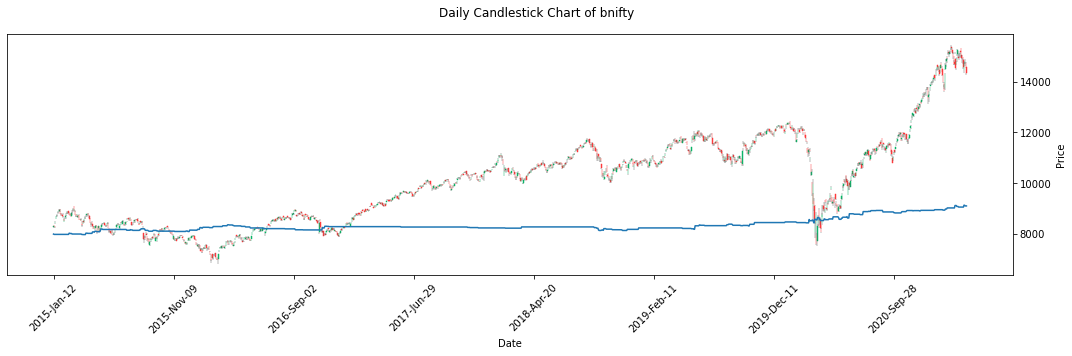

In [255]:
# Creating Subplots
fig, ax = plt.subplots(figsize=(15,5))
mpf.plot(plotbnifty[:], type='candle', style='yahoo',ax=ax,warn_too_much_data=2000)
plt.plot(bal[:])
# plt.plot(bnifty[a:]['Date'], bal,'k')
# plt.plot(bnifty[a:]['Date'], bnifty[a:]['sma'])
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of bnifty')
fig.tight_layout()